In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Importing all the libraries which are required for Data Analysis, Exploratory Data Analysis, Data Visualization and to do Machine Learning. Numpy helps us to perform computations on data easily and Pandas helps us to do thorough Data Analysis. Matplotlib helps us in Data Visualization.

In [2]:
# Reading the data into the pandas dataframe
rides = pd.read_csv("uber_data.csv")

Storing our data which is present in uber_data csv file to Pandas Dataframe named rides.

In [3]:
# Printing out first 5 rows of data
rides.head()

,id,city_name,signup_os,signup_channel,signup_date,bgc_date,vehicle_added_date,vehicle_make,vehicle_model,vehicle_year,first_completed_date
0,1,Strark,ios web,Paid,1/2/16,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Strark,windows,Paid,1/21/16,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Wrouver,windows,Organic,1/11/16,1/11/16,NaN,NaN,NaN,NaN,NaN
3,4,Berton,android web,Referral,1/29/16,2/3/16,2/3/16,Toyota,Corolla,2016.0,2/3/16
4,5,Strark,android web,Referral,1/10/16,1/25/16,1/26/16,Hyundai,Sonata,2016.0,NaN


Using head() method to display the first 5 rows of the data.

# Data Cleaning

In [4]:
# Fill all NaN values with zero on first_completed_date column
rides['first_completed_date'] = rides['first_completed_date'].fillna(0)

first_completed_day has lot of missing values. We need to fill this with zero before converting it to class labels.

In [5]:
# A function which creates a label of 1 or 0 for each row
def create_labels(ride_date):
    if ride_date == 0:
        return 0
    else:
        return 1

A function to convert the rows into labels of '1' and '0'.

In [6]:
# Create a class label column using the above created function 
rides['class_label'] = rides['first_completed_date'].apply(create_labels)

Apply 'create_labels' over first_completd_date column to create a new column of class labels named class_label.

In [7]:
# Check if the class label column is created successfully
rides.head()

,id,city_name,signup_os,signup_channel,signup_date,bgc_date,vehicle_added_date,vehicle_make,vehicle_model,vehicle_year,first_completed_date,class_label
0,1,Strark,ios web,Paid,1/2/16,NaN,NaN,NaN,NaN,NaN,0,0
1,2,Strark,windows,Paid,1/21/16,NaN,NaN,NaN,NaN,NaN,0,0
2,3,Wrouver,windows,Organic,1/11/16,1/11/16,NaN,NaN,NaN,NaN,0,0
3,4,Berton,android web,Referral,1/29/16,2/3/16,2/3/16,Toyota,Corolla,2016.0,2/3/16,1
4,5,Strark,android web,Referral,1/10/16,1/25/16,1/26/16,Hyundai,Sonata,2016.0,0,0


In [8]:
# Know the number of rows and columns of rides using shape attribue
rides.shape

(54681, 12)

In [9]:
# Check if there are any null values in the numeric data coulmns with 'count' row
rides.describe()

,id,vehicle_year,class_label
count,54681.000000,13223.000000,54681.000000
mean,27341.000000,2010.568025,0.112233
std,15785.189372,35.219184,0.315656
min,1.000000,0.000000,0.000000
25%,13671.000000,2008.000000,0.000000
50%,27341.000000,2013.000000,0.000000
75%,41011.000000,2015.000000,0.000000
max,54681.000000,2017.000000,1.000000


In [10]:
# Fill all the NaN values of vehicle_added_date with signup_date 
rides['vehicle_added_date'] = rides['vehicle_added_date'].fillna(rides['signup_date'])

There are a lot of missing values in vehicle_added_date column. A good idea would be to replace them with its signup_date indicating there was no difference at all after the signup and vehicle added. This difference might be one of the potential features for us during model training phase. Lets explore this in depth further.

In [11]:
# Check the data types of all the columns
rides.dtypes

id                        int64
city_name                object
signup_os                object
signup_channel           object
signup_date              object
bgc_date                 object
vehicle_added_date       object
vehicle_make             object
vehicle_model            object
vehicle_year            float64
first_completed_date     object
class_label               int64
dtype: object

We observe even the dates column have object type. This has to be converted to pandas datetime type inorder to get extract some useful time series insights from the data.

In [12]:
# Convert all the date related columns to Pandas datetime type
rides['signup_date'] = pd.to_datetime(rides['signup_date'])
rides['vehicle_added_date'] = pd.to_datetime(rides['vehicle_added_date'])
rides['bgc_date'] = pd.to_datetime(rides['bgc_date'])
rides['first_completed_date'] = pd.to_datetime(rides['first_completed_date'])

In [13]:
# Convert categorical labels to numeric for city_name column
rides.loc[rides["city_name"] == "Berton", "city_name"] = 1
rides.loc[rides["city_name"] == "Strark", "city_name"] = 2
rides.loc[rides["city_name"] == "Wrouver", "city_name"] = 3

Converting all the non-numeric columns to numeric. Find all the unique city names and assign codes 1,2,3 to all three respectively.

In [14]:
# Check all the unique values in signup_os column
rides['signup_os'].unique()

array(['ios web', 'windows', 'android web', nan, 'mac', 'other'], dtype=object)

In [15]:
# Convert categorical labels to numeric for signup_os column
rides.loc[rides["signup_os"] == "ios web", "signup_os"] = 1
rides.loc[rides["signup_os"] == "android web", "signup_os"] = 2
rides.loc[rides["signup_os"] == "mac", "signup_os"] = 3
rides.loc[rides["signup_os"] == "windows", "signup_os"] = 4
rides.loc[rides["signup_os"] == "other", "signup_os"] = 5
rides['signup_os'] = rides['signup_os'].fillna(1)
rides['signup_os'] = rides['signup_os'].astype(str)

Converting signup_os columns to numeric.

In [16]:
# Convert categorical labels to numeric for signup_channel column
rides.loc[rides["signup_channel"] == "Referral", "signup_channel"] = 1
rides.loc[rides["signup_channel"] == "Paid", "signup_channel"] = 2
rides.loc[rides["signup_channel"] == "Organic", "signup_channel"] = 3

Converting signup_channel column to numeric.

In [17]:
# Check if the data types are correct for all variables
rides.dtypes

id                               int64
city_name                       object
signup_os                       object
signup_channel                  object
signup_date             datetime64[ns]
bgc_date                datetime64[ns]
vehicle_added_date      datetime64[ns]
vehicle_make                    object
vehicle_model                   object
vehicle_year                   float64
first_completed_date    datetime64[ns]
class_label                      int64
dtype: object

Now we can see that all the columns data types are correct. Now we can proceed further with our investigation !!!

# Data Visualization

Lets try to visualize our class_label against various parameters like city_name, signup-os, signup_channel, signup_week (extracted from signup_date) inorder to see if we can get any useful information or trends out of it.

(<matplotlib.figure.Figure at 0x21bfa3ea9b0>,
 OrderedDict([(('2', '0'),
               (0.0, 0.0, 0.5351832708919654, 0.88745694028667166)),
              (('2', '1'),
               (0.0,
                0.89077919942288419,
                0.5351832708919654,
                0.10922080057711564)),
              (('3', '0'),
               (0.5401337659414703,
                0.0,
                0.09066084641053127,
                0.90491252445911274)),
              (('3', '1'),
               (0.5401337659414703,
                0.90823478359532528,
                0.09066084641053127,
                0.091765216404674596)),
              (('1', '0'),
               (0.6357451074015066,
                0.0,
                0.3642548925984934,
                0.87593888047282198)),
              (('1', '1'),
               (0.6357451074015066,
                0.87926113960903451,
                0.3642548925984934,
                0.12073886039096533))]))

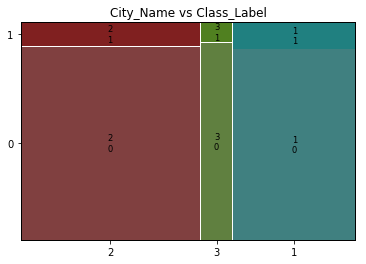

In [18]:
# Create the mosaic plot of city_name versus class_label
from statsmodels.graphics.mosaicplot import mosaic
mosaic(rides, ['city_name', 'class_label'], title = 'City_Name vs Class_Label')

We can see that Berton had slightly more signup-ride conversion rate compared to other cities. This means that Uber wants to concentrate on other 2 cities to increse this conversion.

(<matplotlib.figure.Figure at 0x21bfcc84358>,
 OrderedDict([(('1', '0'),
               (0.0, 0.0, 0.4211413721868477, 0.89743004041334673)),
              (('1', '1'),
               (0.0,
                0.90075229954955927,
                0.4211413721868477,
                0.099247700450440596)),
              (('4', '0'),
               (0.4260433329711614,
                0.0,
                0.12148894963336365,
                0.86459146410822629)),
              (('4', '1'),
               (0.4260433329711614,
                0.86791372324443894,
                0.12148894963336365,
                0.13208627675556098)),
              (('2', '0'),
               (0.5524342433888388,
                0.0,
                0.2679354875030973,
                0.89970441141946533)),
              (('2', '1'),
               (0.5524342433888388,
                0.90302667055567798,
                0.2679354875030973,
                0.096973329444321951)),
              (('3', '0'),

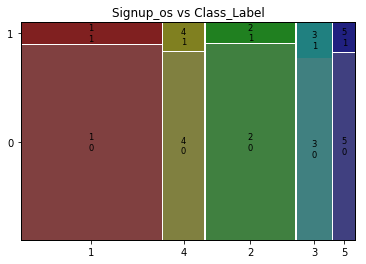

In [19]:
# Create the mosaic plot of signup_os versus class_label
mosaic(rides, ['signup_os', 'class_label'],title = 'Signup_os vs Class_Label')

We can clearly see people signed up from ios and android the most. and conversion rate is more or likely not so different. This might give us some useful insigts while training our machine learning model.

(<matplotlib.figure.Figure at 0x21bfce34e80>,
 OrderedDict([(('2', '0'),
               (0.0, 0.0, 0.43344105080393375, 0.9349734877114716)),
              (('2', '1'),
               (0.0,
                0.93829574684768424,
                0.43344105080393375,
                0.061704253152315681)),
              (('3', '0'),
               (0.4383915458534387,
                0.0,
                0.2431202685748357,
                0.9068602040763305)),
              (('3', '1'),
               (0.4383915458534387,
                0.91018246321254304,
                0.2431202685748357,
                0.089817536787456825)),
              (('1', '0'),
               (0.6864623094777794,
                0.0,
                0.31353769052222064,
                0.79838975187812389)),
              (('1', '1'),
               (0.6864623094777794,
                0.80171201101433642,
                0.31353769052222064,
                0.19828798898566344))]))

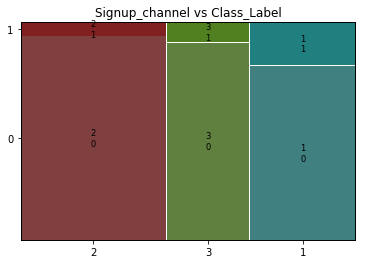

In [20]:
# Create the mosaic plot of signup_channel versus class_label
mosaic(rides, ['signup_channel', 'class_label'],title = 'Signup_channel vs Class_Label')

The above figures helps us in a greater way. We can see a lot of signup-ride conversion when signup channel is via referral. Hence Uber might want to concentrate on improving and encouraging more and more people to refer their friends and relatives via some referral programs/perks and benifits etc.

(<matplotlib.figure.Figure at 0x21bfcfaabe0>,
 OrderedDict([(('53', '0'),
               (0.0, 0.0, 0.10725308392957227, 0.91353795606087362)),
              (('53', '1'),
               (0.0,
                0.91686021519708616,
                0.10725308392957227,
                0.083139784802913716)),
              (('3', '0'),
               (0.112155044713886,
                0.0,
                0.22307637416444973,
                0.88853476142590648)),
              (('3', '1'),
               (0.112155044713886,
                0.89185702056211913,
                0.22307637416444973,
                0.1081429794378808)),
              (('2', '0'),
               (0.34013337966264945,
                0.0,
                0.20668899223338497,
                0.87814502202927547)),
              (('2', '1'),
               (0.34013337966264945,
                0.88146728116548811,
                0.20668899223338497,
                0.11853271883451179)),
              (('4', '

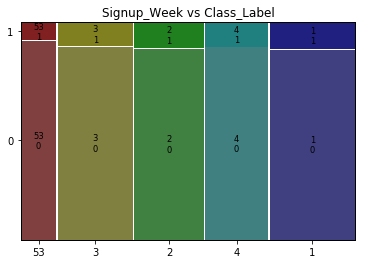

In [21]:
# Create the mosaic plot of signup_week versus class_label
rides['signup_week'] = rides['signup_date'].dt.week
mosaic(rides, ['signup_week', 'class_label'], title = 'Signup_Week vs Class_Label')

The signup week also doesnt give us any critical information.

In [22]:
# Collect all the class label rows to new dataframe called num
num = rides[rides['class_label'] == 1]
num.shape

(6137, 13)

In [23]:
# Check what portion of signed up drivers actually start driving
ride_start = num.shape[0] / rides.shape[0]
print(ride_start)

0.11223276823759624


This shows that only 11.22% of the signed up drivers start driving !!!

# Machine Learning

Since this is a classification problem, let us try to build a model using Logistic Regression and Random Forest Classifier using sklearn library. We can also compare their accuracies in parallel to check which model performs better (meaning which model predicts better). Inorder to avoid overfitting, I am using the method of cross validation and training the model with train data and tetsing it with test data. For Logistic Regression, 5 folds of cross-validation is activated and for Random Forest, 3 folds. Finally after getting the individual accuracies for the respective models, taking the average gives us the mean accuracy.

For prediction purpose, intially I am using three main predictors namely "city_name","signup_os","signup_channel". In the later part, I am doing some feature engineering to extract some useful insights from the date columns.

In [25]:
# Logistic Regression using sklearn
from sklearn import cross_validation
from sklearn.linear_model import LogisticRegression

predictors = ["city_name","signup_os","signup_channel"]

# Initialize our algorithm
alg = LogisticRegression(random_state=1)
# Compute the accuracy score for all the cross validation folds
scores = cross_validation.cross_val_score(alg,rides[predictors], rides["class_label"], cv=5)
# Take the mean of the scores (because we have one for each fold)
print(scores.mean())

0.887767233912


We get a good accuracy score using the above three predictors which proves that our visualization above gave us the same insights which told us that these three were the attributes which influenced the signup-ride conversion rate more.

In [26]:
# Random Forest using sklearn
from sklearn import cross_validation
from sklearn.ensemble import RandomForestClassifier

alg = RandomForestClassifier(random_state=1, n_estimators=10, min_samples_split=2, min_samples_leaf=1)

kf = cross_validation.KFold(rides.shape[0], n_folds=3, random_state=1)
scores = cross_validation.cross_val_score(alg, rides[predictors], rides["class_label"], cv=kf)

print(scores.mean())

0.887767231762


Even the Random Forest classifier almost gives us the same accuracy score. Lets try by changing n_estimators and min_sample_split to check if that would increase our prediction rate.

In [27]:
# Changing the estimators to increase the accuracy
alg = RandomForestClassifier(random_state=1, n_estimators=50, min_samples_split=4, min_samples_leaf=2)

kf = cross_validation.KFold(rides.shape[0], n_folds = 3, random_state=1)
scores = cross_validation.cross_val_score(alg, rides[predictors], rides["class_label"], cv=kf)

print(scores.mean())

0.887767231762


# Feature Engineering

We have three main date fields namely signup_date, vehicle_added_date and first_completed_date. Lets do some feature engineering to get useful insights with this data.

1) delay_adding -> After the driver singed up, his/her information has to be approved and added. The difference between these two dates might influence the driver. More the difference, the driver might change his plans and not start driving at all or he might opt for any other UBER competitor like Lyft. Hence lets try to check if this has any effect to our predictions.

2) delay_bgc_date -> After the driver singed up, his/her information has to be background checked. Let us check if the difference in these days has any effect on the driver to make his first ride.

3) completed - added -> This is the difference in timings between the drivers first ride date and the vehicle added date. This might be one of the factors during our prediction. 

In [28]:
# Create a column of delay_adding and add it to pandas dataframe
rides['delay_adding'] = rides['vehicle_added_date'] - rides['signup_date']
rides['delay_adding'] = rides['delay_adding'].apply(lambda x: str(x))

In [29]:
# Function to convert the column from datetime to numeric
def convert_column(num):
    tempo = num.split(' ')[0]
    if int(tempo) <= 0:
        return 0
    else:
        return int(tempo)

In [30]:
# Convert delay_adding column to numeric
rides['delay_adding'] = rides['delay_adding'].apply(convert_column)

In [31]:
# Create a column of difference between completed and vehicle added time
rides['completed-added'] = (rides['first_completed_date'] - rides['vehicle_added_date'])
rides['completed-added'] = rides['completed-added'].apply(lambda x: str(x))

In [32]:
# Convert completed-added column to numeric
rides['completed-added'] = rides['completed-added'].apply(convert_column)

In [33]:
# Check the unique values  in the completed-added column
rides['completed-added'].unique()

array([ 0,  2, 16,  3,  7, 12,  4, 18,  1, 26,  5, 22, 13, 25, 24, 10,  8,
        9, 11,  6, 15, 17, 14, 19, 29, 21, 23, 20, 28, 27, 30], dtype=int64)

In [34]:
# Check if all the feature engineering techniques resulted in correct transformations
rides.head()

,id,city_name,signup_os,signup_channel,signup_date,bgc_date,vehicle_added_date,vehicle_make,vehicle_model,vehicle_year,first_completed_date,class_label,signup_week,delay_adding,completed-added
0,1,2,1,2,2016-01-02,NaT,2016-01-02,NaN,NaN,NaN,1970-01-01,0,53,0,0
1,2,2,4,2,2016-01-21,NaT,2016-01-21,NaN,NaN,NaN,1970-01-01,0,3,0,0
2,3,3,4,3,2016-01-11,2016-01-11,2016-01-11,NaN,NaN,NaN,1970-01-01,0,2,0,0
3,4,1,2,1,2016-01-29,2016-02-03,2016-02-03,Toyota,Corolla,2016.0,2016-02-03,1,4,5,0
4,5,2,2,1,2016-01-10,2016-01-25,2016-01-26,Hyundai,Sonata,2016.0,1970-01-01,0,1,16,0


In [35]:
# Create delay_bg_check feature by using the difference in signup and bgc dates
rides['bgc_date'] = rides['bgc_date'].fillna(rides['signup_date'])
rides['delay_bgc_date'] = rides['bgc_date'] - rides['signup_date']
rides['delay_bgc_date'] = rides['delay_bgc_date'].apply(lambda x: str(x))
rides['delay_bgc_date'] = rides['delay_bgc_date'].apply(convert_column)

In [36]:
rides.head()

,id,city_name,signup_os,signup_channel,signup_date,bgc_date,vehicle_added_date,vehicle_make,vehicle_model,vehicle_year,first_completed_date,class_label,signup_week,delay_adding,completed-added,delay_bgc_date
0,1,2,1,2,2016-01-02,2016-01-02,2016-01-02,NaN,NaN,NaN,1970-01-01,0,53,0,0,0
1,2,2,4,2,2016-01-21,2016-01-21,2016-01-21,NaN,NaN,NaN,1970-01-01,0,3,0,0,0
2,3,3,4,3,2016-01-11,2016-01-11,2016-01-11,NaN,NaN,NaN,1970-01-01,0,2,0,0,0
3,4,1,2,1,2016-01-29,2016-02-03,2016-02-03,Toyota,Corolla,2016.0,2016-02-03,1,4,5,0,5
4,5,2,2,1,2016-01-10,2016-01-25,2016-01-26,Hyundai,Sonata,2016.0,1970-01-01,0,1,16,0,15


# Machine Learning

Lets not just blindly consider these 3 new features along with the above 3 older features. Let us try to select the best predictors using the p-values from the below approach.

C:\Users\vinay\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: RuntimeWarning: divide by zero encountered in log10


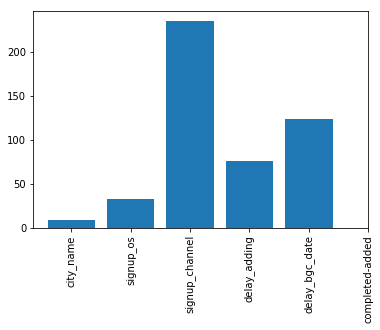

In [37]:
# Finding the Best Features
from sklearn.feature_selection import SelectKBest, f_classif

predictors = ["city_name","signup_os","signup_channel","delay_adding", "delay_bgc_date", "completed-added"]

# Perform feature selection
selector = SelectKBest(f_classif, k=5)
selector.fit(rides[predictors], rides["class_label"])

# Get p-values for each feature, and transform from p-values into scores
scores = -np.log10(selector.pvalues_)

# Plotting the scores. We can see how "city_name","signup_os","signup_channel","delay_adding", "delay_bgc_date" are the best
plt.bar(range(len(predictors)), scores)
plt.xticks(range(len(predictors)), predictors, rotation='vertical')
plt.show()

Above graph is the proof from our mosaic plot visualization which said signup_channel influences our model in a greater way. Next are our new feature delay_bgc_date, delay_adding and then signup_os and city_name. compelted-added feature has a least influence. Hence let us not consider that for prediction purpose.

In [38]:
# Pick only five best features.
predictors = ["city_name","signup_os","signup_channel","delay_adding","delay_bgc_date"]

alg = RandomForestClassifier(random_state=1, n_estimators=50, min_samples_split=8, min_samples_leaf=4)
scores = cross_validation.cross_val_score(alg, rides[predictors], rides["class_label"], cv=3)

print(scores.mean())

0.928476039053


Using our new features 'delay_adding','delay_bgc_date' along with old predictors "city_name","signup_os","signup_channel" increased our accuracy to 92.8% which is a good thing.

Hence this predictive model helps UBER to predict which of their future signed up users would start driving and this model along with above visualizations also give sufficient information like (referral scheme, which city to target, not to create much of delay with signup, background check and adding timings etc.) to improve their process/model to make more business.